In [12]:
import pandas as pd
import seaborn as sns

# Carga de datos

In [3]:

# Ruta de los archivos CSV de prueba y entrenamiento
ruta_test = "data/test.csv"
ruta_train = "data/train.csv"

# Cargar los archivos CSV en DataFrames
df_test = pd.read_csv(ruta_test)
df_train = pd.read_csv(ruta_train)


In [4]:
df_train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10407.0,5203.000000,3004.386460,0.0,2601.500000,5203.000000,7804.500000,10406.000000
allelectrons_Total,10407.0,128.053516,224.123776,0.0,68.000000,100.000000,131.000000,15300.000000
density_Total,10407.0,14.491342,15.972877,0.0,7.558488,10.650000,16.676996,643.093804
allelectrons_Average,10407.0,17.033222,10.468734,0.0,10.000000,12.600000,22.000000,67.000000
val_e_Average,10407.0,4.546789,0.690864,0.0,4.000000,4.714286,4.800000,6.000000
atomicweight_Average,10407.0,37.507703,26.012313,0.0,20.298893,26.203827,48.719500,167.400000
ionenergy_Average,10407.0,10.938308,1.408276,0.0,10.590660,11.202760,11.670725,15.245810
el_neg_chi_Average,10407.0,2.607662,0.334906,0.0,2.530000,2.706000,2.805000,3.443000
R_vdw_element_Average,10407.0,1.731330,0.192481,0.0,1.672500,1.732727,1.800000,2.250000
R_cov_element_Average,10407.0,0.944132,0.180017,0.0,0.864000,0.915556,0.981667,1.615840


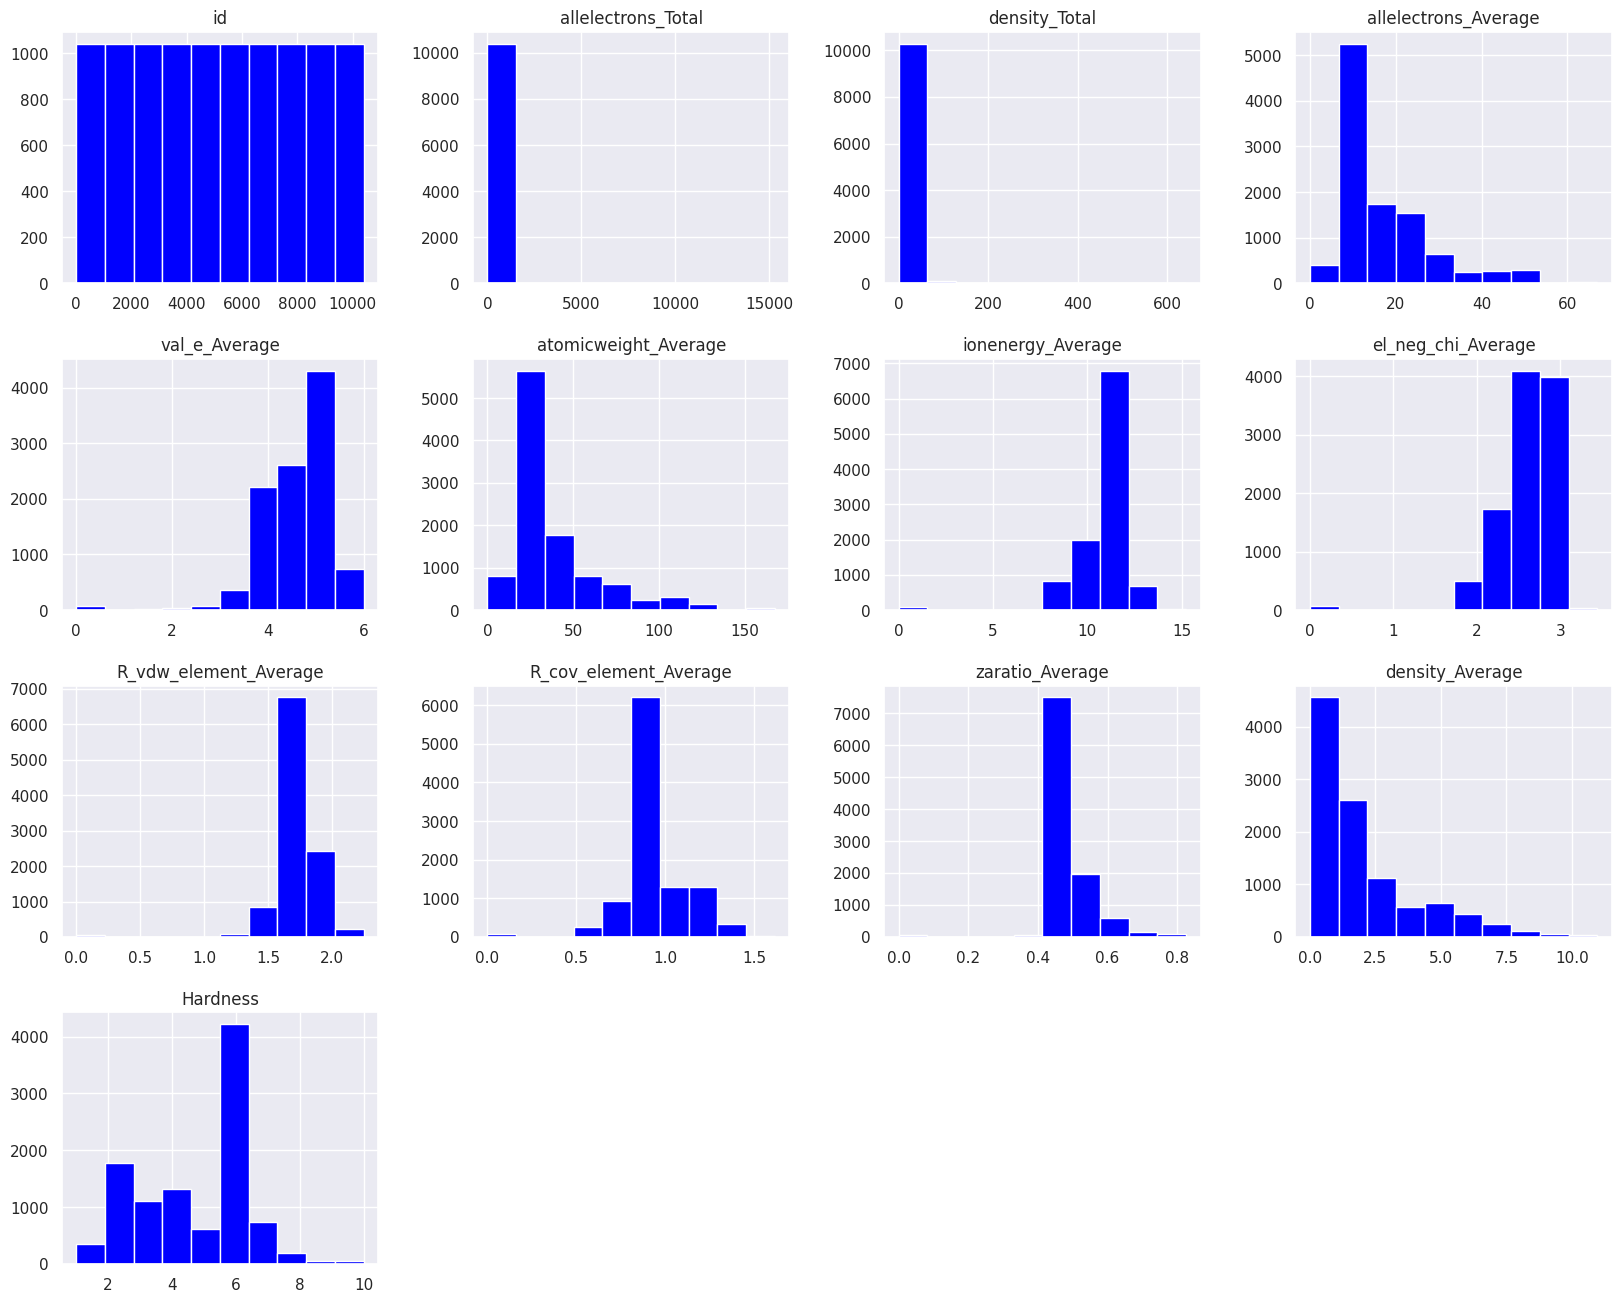

In [14]:
sns.set(rc={'figure.figsize': (20, 16)})
df_train.hist(color='blue');

In [7]:
from sklearn.model_selection import train_test_split

# Define the features and target variables
features = df_train.drop("Hardness", axis=1)
target = df_train["Hardness"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [8]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

MSE Modelo Lineal: 2.105345997105267
MSE Bosque Aleatorio: 1.5212513221661863


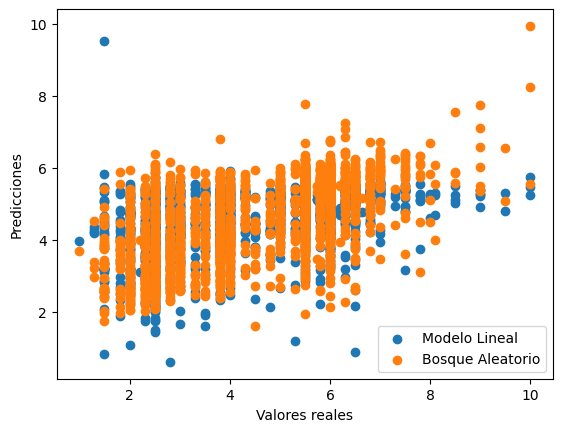

In [9]:
# Modelo 1: Regresión lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Modelo 2: Bosque aleatorio
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_linear = model_linear.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Evaluar el rendimiento de los modelos
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'MSE Modelo Lineal: {mse_linear}')
print(f'MSE Bosque Aleatorio: {mse_rf}')

# Visualizar las predicciones
plt.scatter(y_test, y_pred_linear, label='Modelo Lineal')
plt.scatter(y_test, y_pred_rf, label='Bosque Aleatorio')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

In [10]:
# Suponiendo que df_test contiene tus datos de prueba
# Asegúrate de preprocesar df_test de la misma manera que se hizo con los datos de entrenamiento

# Realizar predicciones en el conjunto de prueba utilizando ambos modelos
y_pred_test_linear = model_linear.predict(df_test)
y_pred_test_rf = model_rf.predict(df_test)

# Crear un DataFrame con las predicciones y los ID correspondientes
submission_linear = pd.DataFrame({'id': df_test['id'], 'Hardness_linear': y_pred_test_linear})
submission_rf = pd.DataFrame({'id': df_test['id'], 'Hardness_rf': y_pred_test_rf})

# Guardar los DataFrames en archivos CSV
submission_linear.to_csv('submission_linear.csv', index=False)
submission_rf.to_csv('submission_rf.csv', index=False)
